In [5]:
from astropy.io import fits
import astropy.units as u
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
import numpy as np
import proper

import misc

hlcdir_old = Path('/groups/douglase/phaseb_data/hlc_20190210'); print(hlcdir_old)
hlcdir = Path('/groups/douglase/webbpsf-data/CGI/optics/F575'); print(hlcdir)

lambda_m = 575e-9*u.m
D = 2.3633372*u.m

lamD = lambda_m/D
as_per_lamD = lamD * 180/np.pi * 3600

/groups/douglase/phaseb_data/hlc_20190210
/groups/douglase/webbpsf-data/CGI/optics/F575


# Add pupil scales to the pupil files.

/groups/douglase/webbpsf-data/CGI/optics/F575/run461_pupil.fits
0.007648340453074434 m / pix (1024, 1024)
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_pupil_rotated.fits
0.007648340453074434 m / pix (1024, 1024)


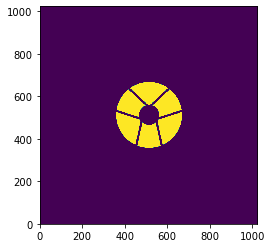

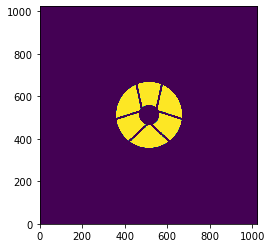

In [11]:
pupil_fnames = ['run461_pupil.fits', 'run461_pupil_rotated.fits']
pupil_diam = 2.3633372*u.m
pupil_diam_pix = 309*u.pixel

for fname in pupil_fnames:
    hlc575pup = fits.open(hlcdir_old/fname)
    hlc575pup_data = hlc575pup[0].data
    hlc575pup.close()
    
    hdr = fits.Header()
    hdr['PIXSCALE'] = pupil_diam.value
    hdr['PUPLSCAL'] = pupil_diam.value/pupil_diam_pix.value
    hdr['PIXSCALE'] = pupil_diam.value/pupil_diam_pix.value
    hlc575pup_new = fits.PrimaryHDU(data=hlc575pup_data, header=hdr)
    hlc575pup_new.writeto(hlcdir/fname, overwrite=True)
    print(hlcdir/fname)
    print(pupil_diam/pupil_diam_pix, hlc575pup_data.shape)
    plt.figure()
    plt.imshow(hlc575pup_data)

# Add pixel scales to the FPM files.

0 2.68415151111429e-06 5.4625e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.4625e-07theta6.69polp_real.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.4625e-07theta6.69polp_imag.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.4625e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.4625e-07theta6.69polp_imag_rotated.fits

1 2.69984830357695e-06 5.49444444444e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.49444444444e-07theta6.69polp_real.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.49444444444e-07theta6.69polp_imag.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.49444444444e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.49444444444e-07theta6.69polp_imag_rotated.fits

2 2.7155450960396e-06 5.52638888889e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.526388888

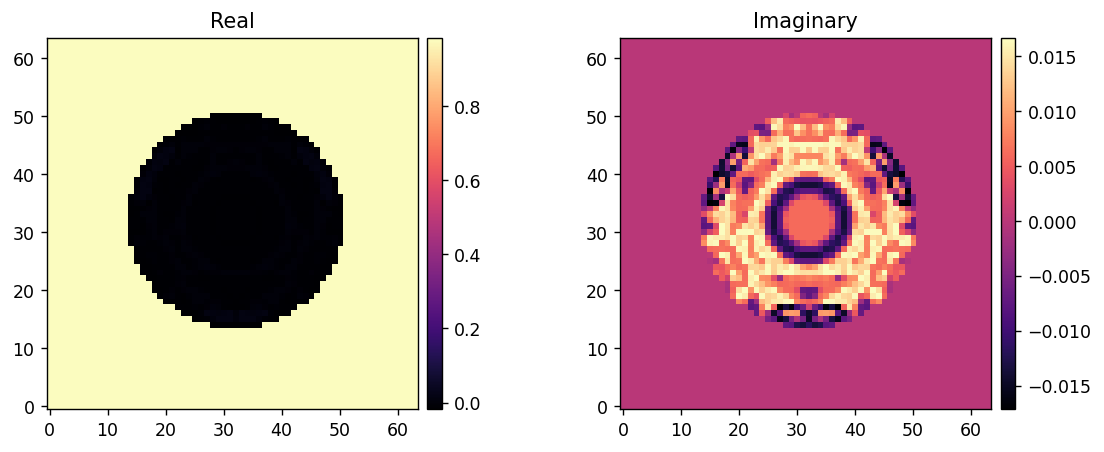

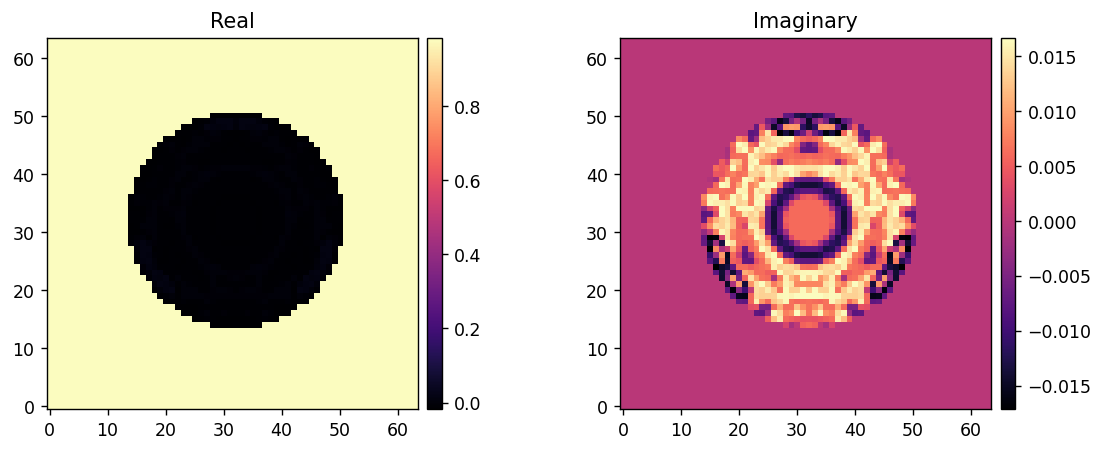

12 2.8254226432782e-06 5.75e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.75e-07theta6.69polp_real.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.75e-07theta6.69polp_imag.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.75e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.75e-07theta6.69polp_imag_rotated.fits

13 2.84111943574086e-06 5.78194444444e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.78194444444e-07theta6.69polp_real.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.78194444444e-07theta6.69polp_imag.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.78194444444e-07theta6.69polp_real_rotated.fits
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.78194444444e-07theta6.69polp_imag_rotated.fits

14 2.85681622820351e-06 5.81388888889e-07
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_occ_lam5.81388888889e-07t

In [19]:
occ_lam = [5.4625e-07, 5.49444444444e-07, 5.52638888889e-07, 5.534375e-07, 5.55833333333e-07, 
           5.59027777778e-07, 5.60625e-07, 5.62222222222e-07, 5.65416666667e-07, 5.678125e-07, 
           5.68611111111e-07, 5.71805555556e-07, 5.75e-07, 5.78194444444e-07, 5.81388888889e-07, 
           5.821875e-07, 5.84583333333e-07, 5.87777777778e-07, 5.89375e-07, 5.90972222222e-07,
           5.94166666667e-07, 5.965625e-07, 5.97361111111e-07, 6.00555555556e-07, 6.0375e-07 ]
occ_lam_strs = ['5.4625e-07', '5.49444444444e-07', '5.52638888889e-07', '5.534375e-07', '5.55833333333e-07', 
                '5.59027777778e-07', '5.60625e-07', '5.62222222222e-07', '5.65416666667e-07', '5.678125e-07', 
                '5.68611111111e-07', '5.71805555556e-07', '5.75e-07', '5.78194444444e-07', '5.81388888889e-07', 
                '5.821875e-07', '5.84583333333e-07', '5.87777777778e-07', '5.89375e-07', '5.90972222222e-07', 
                '5.94166666667e-07', '5.965625e-07', '5.97361111111e-07', '6.00555555556e-07', '6.0375e-07' ]
occ_r_fnames = ['run461_occ_lam' + s + 'theta6.69polp_real.fits' for s in occ_lam_strs ]
occ_i_fnames = ['run461_occ_lam' + s + 'theta6.69polp_imag.fits' for s in occ_lam_strs ]
occ_r_rot_fnames = ['run461_occ_lam' + s + 'theta6.69polp_real_rotated.fits' for s in occ_lam_strs ]
occ_i_rot_fnames = ['run461_occ_lam' + s + 'theta6.69polp_imag_rotated.fits' for s in occ_lam_strs ]

for i,fname in enumerate(occ_r_fnames):
    hlc575occ_r = fits.open(hlcdir_old/occ_r_fnames[i])
    hlc575occ_i = fits.open(hlcdir_old/occ_i_fnames[i])
    hlc575occ_r_rot = fits.open(hlcdir_old/occ_r_rot_fnames[i])
    hlc575occ_i_rot = fits.open(hlcdir_old/occ_i_rot_fnames[i])
    
    real_new = hlc575occ_r[0].data
    imag_new = hlc575occ_i[0].data
    real_rot_new = hlc575occ_r_rot[0].data
    imag_rot_new = hlc575occ_i_rot[0].data
    pxscl = hlc575occ_r[0].header['DX']
    
    hlc575occ_r.close()
    hlc575occ_i.close()
    hlc575occ_r_rot.close()
    hlc575occ_i_rot.close()
        
    real_fpath = str(hlcdir/occ_r_fnames[i])
    hdr = fits.Header()
    hdr['PIXELSCL'] = pxscl
    wf_hdu = fits.PrimaryHDU(data=real_new, header=hdr)
    wf_hdu.writeto(real_fpath, overwrite=True)

    imag_fpath = str(hlcdir/occ_i_fnames[i])
    hdr = fits.Header()
    hdr['PIXELSCL'] = pxscl
    wf_hdu = fits.PrimaryHDU(data=imag_new, header=hdr)
    wf_hdu.writeto(imag_fpath, overwrite=True)

    real_rot_fpath = str(hlcdir/occ_r_rot_fnames[i])
    hdr = fits.Header()
    hdr['PIXELSCL'] = pxscl
    wf_hdu = fits.PrimaryHDU(data=real_rot_new, header=hdr)
    wf_hdu.writeto(real_rot_fpath, overwrite=True)

    imag_rot_fpath = str(hlcdir/occ_i_rot_fnames[i])
    hdr = fits.Header()
    hdr['PIXELSCL'] = pxscl
    wf_hdu = fits.PrimaryHDU(data=imag_rot_new, header=hdr)
    wf_hdu.writeto(imag_rot_fpath, overwrite=True)
    
    if '5.75e-07' in occ_r_fnames[i]:
        misc.myimshow2(real_new, imag_new, 'Real', 'Imaginary', n=64)
        misc.myimshow2(real_rot_new, imag_rot_new, 'Real', 'Imaginary', n=64)
    print(i, pxscl, occ_lam[i])
    print(real_fpath)
    print(imag_fpath)
    print(real_rot_fpath)
    print(imag_rot_fpath)
    print()


# Add pupil scales to the lyot stop files.

/groups/douglase/webbpsf-data/CGI/optics/F575/run461_lyot.fits
(1024, 1024) 5.50171931752267e-05 m
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_lyot_rotated.fits
(1024, 1024) 5.50171931752267e-05 m


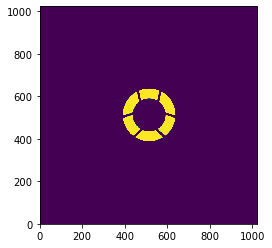

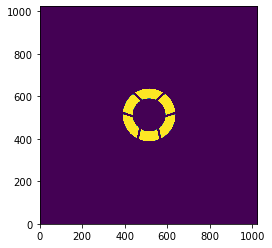

In [12]:
ls_fnames = ['run461_lyot.fits', 'run461_lyot_rotated.fits']
ls_sampling = 5.50171931752267e-05*u.m

for i,fname in enumerate(ls_fnames):
    hlc575ls = fits.open(hlcdir_old/fname)
    ls_data = hlc575ls[0].data
    hlc575ls.close()
    
    hdr = fits.Header()
    hdr['PUPLDIAM'] = ls_sampling.value*309
    hdr['PUPLSCAL'] = ls_sampling.value
    hdr['PIXELSCL'] = ls_sampling.value
    ls_new = fits.PrimaryHDU(data=ls_data, header=hdr)
    ls_new.writeto(hlcdir/fname, overwrite=True)
    print(str(hlcdir/fname))
    print(ls_data.shape, ls_sampling)
    plt.figure()
    plt.imshow(ls_data)

## Alter the DM fits files.

/groups/douglase/webbpsf-data/CGI/optics/F575/run461_dm1wfe.fits
(1024, 1024) 0.000149840805462465 m
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_dm2wfe.fits
(1024, 1024) 0.000149840805462465 m
/groups/douglase/webbpsf-data/CGI/optics/F575/run461_dm2mask.fits
(1024, 1024) 0.000149840805462465 m


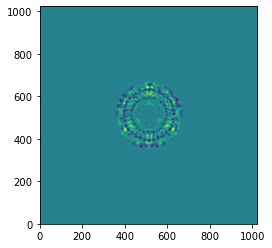

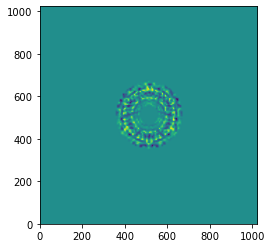

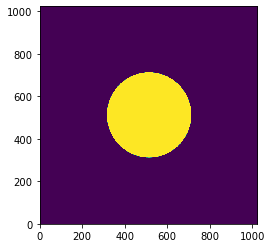

In [10]:
dm_fnames = ['run461_dm1wfe.fits', 'run461_dm2wfe.fits', 'run461_dm2mask.fits']
dm_sampling_m = 0.000149840805462465*u.m

for fname in dm_fnames:
    dm = fits.open(hlcdir_old/fname)
    dm_data = dm[0].data
    dm.close()
    
    hdr = fits.Header()
    hdr['PUPLDIAM'] = dm_sampling_m.value*309
    hdr['PUPLSCAL'] = dm_sampling_m.value
    hdr['PIXELSCL'] = dm_sampling_m.value
    dm_new = fits.PrimaryHDU(data=dm_data, header=hdr)
    dm_new.writeto(hlcdir/fname, overwrite=True)
    print(str(hlcdir/fname))
    print(dm_data.shape, dm_sampling_m)
    plt.figure()
    plt.imshow(dm_data)